In [14]:
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import PartialDependenceDisplay
import pandas as pd
from sklearn.metrics import classification_report, balanced_accuracy_score

In [21]:
df = pd.read_csv('../Data/black_box_2_data.csv')

In [29]:
model= xgb.XGBClassifier()
model.load_model('../Models/xgboost_model.json')

# Select features and target
X = df.drop(columns=['Default (y)', 'Pred_default (y_hat)', 'PD', 'Group'])
y = df['Default (y)']

In [30]:
best_model = model.fit(X, y)

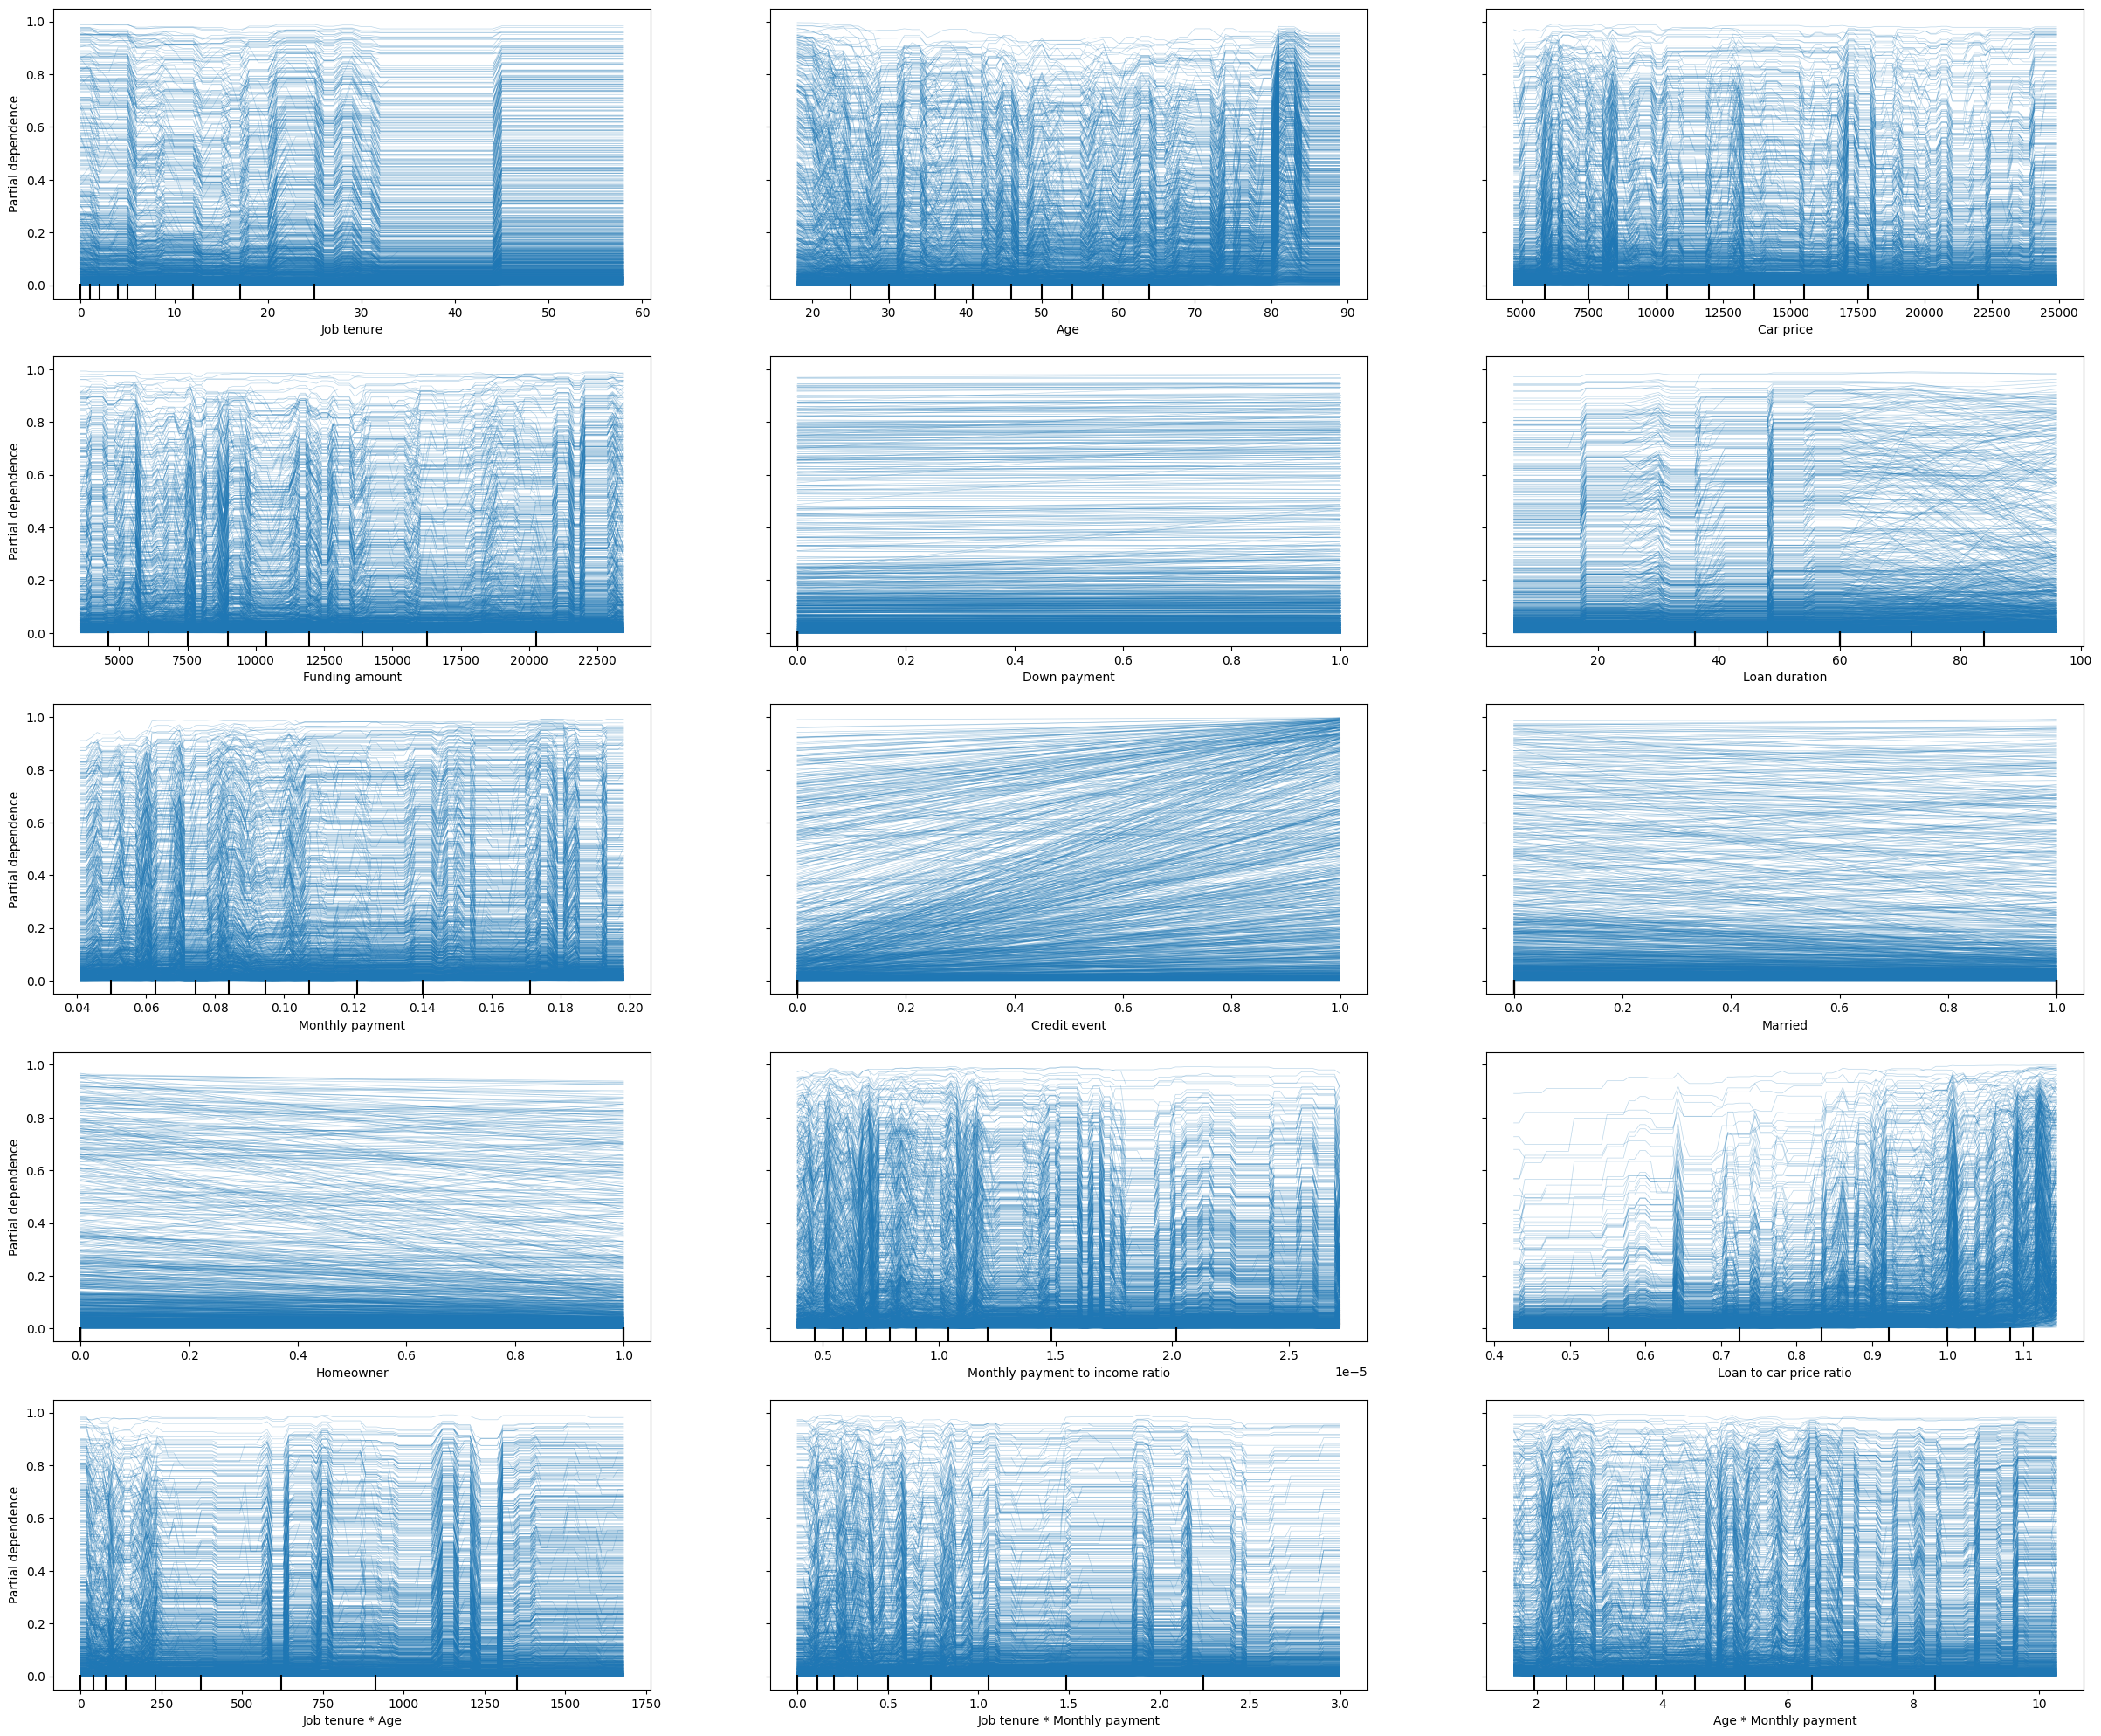

In [33]:
n_features = X.shape[1]  # Get the number of features

# Step 2: Plot ICE for all features
fig, ax = plt.subplots(figsize=(30, 25))  # Adjust size for better visibility

PartialDependenceDisplay.from_estimator(
    best_model,                 # The loaded XGBoost model
    X,               # The feature matrix (input data)
    features=range(n_features),  # Plot ICE for all features
    kind="individual",     # ICE: Individual Conditional Expectation
    ax=ax
)

plt.show()